In [51]:
# import libraries
import numpy as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
tsv_file='test_cli.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('test_cli.csv',index=False)

In [53]:
tsv_file='test_pro.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('test_pro.csv',index=False)

In [54]:
tsv_file='test_rna.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('test_rna.csv',index=False)

In [55]:
try:
    target = pd.read_csv('test_cli.csv')
    target.T
    Ymsi = target['msi']
    print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [56]:
target.head()

,sample,gender,msi
0,Testing_1,Female,MSI-Low/MSS
1,Testing_2,Male,MSI-Low/MSS
2,Testing_3,Female,MSI-Low/MSS
3,Testing_4,Male,MSI-Low/MSS
4,Testing_5,Female,MSI-Low/MSS


In [57]:
#Ymsi.index = np.arange(1, len(Ymsi) + 1)
Ymsi

0     MSI-Low/MSS
1     MSI-Low/MSS
2     MSI-Low/MSS
3     MSI-Low/MSS
4     MSI-Low/MSS
5     MSI-Low/MSS
6     MSI-Low/MSS
7     MSI-Low/MSS
8     MSI-Low/MSS
9     MSI-Low/MSS
10    MSI-Low/MSS
11    MSI-Low/MSS
12    MSI-Low/MSS
13    MSI-Low/MSS
14    MSI-Low/MSS
15    MSI-Low/MSS
16    MSI-Low/MSS
17       MSI-High
18    MSI-Low/MSS
19    MSI-Low/MSS
20    MSI-Low/MSS
21       MSI-High
22    MSI-Low/MSS
23       MSI-High
24    MSI-Low/MSS
25    MSI-Low/MSS
26    MSI-Low/MSS
27       MSI-High
28    MSI-Low/MSS
29    MSI-Low/MSS
         ...     
50    MSI-Low/MSS
51    MSI-Low/MSS
52    MSI-Low/MSS
53    MSI-Low/MSS
54    MSI-Low/MSS
55    MSI-Low/MSS
56    MSI-Low/MSS
57       MSI-High
58    MSI-Low/MSS
59    MSI-Low/MSS
60    MSI-Low/MSS
61    MSI-Low/MSS
62    MSI-Low/MSS
63    MSI-Low/MSS
64    MSI-Low/MSS
65    MSI-Low/MSS
66    MSI-Low/MSS
67    MSI-Low/MSS
68    MSI-Low/MSS
69       MSI-High
70       MSI-High
71    MSI-Low/MSS
72    MSI-Low/MSS
73    MSI-Low/MSS
74    MSI-

In [58]:
#loading the label(target) in dataframe on which we will train the data
#sum_tab_2.csv has target data for clinical, proteomics and rna
#thus taking just proteomics right now for training on proteomics data
try:
  target = pd.read_csv('sum_tab_2.csv')
  Y = target['RNAseq']
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [59]:
#loading the proteomics training data in dataframe on which we will train the data
try:
  data = pd.read_csv('test_pro.csv')
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [60]:
#to check the training data
data.head()

,Testing_1,Testing_2,Testing_3,Testing_4,Testing_5,Testing_6,Testing_7,Testing_8,Testing_9,Testing_10,...,Testing_71,Testing_72,Testing_73,Testing_74,Testing_75,Testing_76,Testing_77,Testing_78,Testing_79,Testing_80
0,3.446723,3.669580,3.398472,3.112875,3.535956,3.222556,4.011226,3.660633,2.459769,3.529445,...,2.747886,3.107907,2.796258,3.975565,3.854046,3.840117,2.531494,2.642408,3.913182,4.141304
1,5.994520,6.371038,6.132440,5.645341,5.532811,5.754886,5.917435,6.056136,5.526915,5.652671,...,6.164473,6.404276,5.067085,6.497901,5.259377,6.172335,5.496268,6.395966,5.963701,6.308505
2,2.168001,2.410543,NaN,2.211822,0.987561,1.737837,2.381688,2.193863,1.759665,2.310238,...,2.842435,1.694889,1.520694,2.860077,2.233857,2.305192,1.470474,1.073909,1.102109,1.088823
3,NaN,1.024838,NaN,1.099892,1.076615,1.001861,1.924734,1.024838,NaN,1.878005,...,2.481767,NaN,1.978784,1.024838,NaN,0.990946,2.821773,1.428959,NaN,NaN
4,NaN,0.991114,1.096724,1.056902,NaN,NaN,1.010897,0.991114,NaN,1.010897,...,1.181934,1.044511,1.010897,0.991114,1.066978,NaN,1.911122,NaN,1.040694,NaN


In [61]:
#for transposing as the target has 80 outputs and the data given above has 80 columns and 4118 rows
data = data.T

In [62]:
#to check the transposed training data
data.reset_index()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117
Testing_1,3.446723,5.994520,2.168001,NaN,NaN,1.613696,NaN,4.412741,3.166511,1.056106,...,NaN,2.528991,NaN,2.245434,NaN,1.058798,1.848274,2.565798,3.597116,1.636396
Testing_2,3.669580,6.371038,2.410543,1.024838,0.991114,1.192009,NaN,4.769827,3.096463,2.355183,...,1.005540,1.976372,NaN,1.287584,1.733361,NaN,0.997150,2.265862,3.967766,1.802938
Testing_3,3.398472,6.132440,NaN,NaN,1.096724,2.132646,1.141625,4.273302,0.998518,NaN,...,NaN,1.399577,NaN,1.908988,1.126579,NaN,1.120824,2.944166,3.779964,1.756282
Testing_4,3.112875,5.645341,2.211822,1.099892,1.056902,2.060400,NaN,4.904586,2.417391,NaN,...,1.076813,2.571042,NaN,2.288274,1.081373,1.780610,1.074043,NaN,3.918465,NaN
Testing_5,3.535956,5.532811,0.987561,1.076615,NaN,NaN,1.067227,2.481525,3.285401,1.049430,...,NaN,2.523349,NaN,2.886522,NaN,1.721321,NaN,1.795269,3.535849,NaN


In [63]:
#to replace the NaN values by the mean of each row for every individual row
X = data.apply(lambda x: x.fillna(x.mean()),axis=1)

In [64]:
#to check the transposed mean filled training data
X.head()
#X=X.reset_index()
#X.drop(['index'],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117
Testing_1,3.446723,5.994520,2.168001,2.702256,2.702256,1.613696,2.702256,4.412741,3.166511,1.056106,...,2.702256,2.528991,2.702256,2.245434,2.702256,1.058798,1.848274,2.565798,3.597116,1.636396
Testing_2,3.669580,6.371038,2.410543,1.024838,0.991114,1.192009,2.706912,4.769827,3.096463,2.355183,...,1.005540,1.976372,2.706912,1.287584,1.733361,2.706912,0.997150,2.265862,3.967766,1.802938
Testing_3,3.398472,6.132440,2.691813,2.691813,1.096724,2.132646,1.141625,4.273302,0.998518,2.691813,...,2.691813,1.399577,2.691813,1.908988,1.126579,2.691813,1.120824,2.944166,3.779964,1.756282
Testing_4,3.112875,5.645341,2.211822,1.099892,1.056902,2.060400,2.696098,4.904586,2.417391,2.696098,...,1.076813,2.571042,2.696098,2.288274,1.081373,1.780610,1.074043,2.696098,3.918465,2.696098
Testing_5,3.535956,5.532811,0.987561,1.076615,2.715043,2.715043,1.067227,2.481525,3.285401,1.049430,...,2.715043,2.523349,2.715043,2.886522,2.715043,1.721321,2.715043,1.795269,3.535849,2.715043


In [65]:
#to check the label(target) data of proteomics
Y.head()

0    1
1    2
2    3
3    4
4    5
Name: RNAseq, dtype: int64

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
#to use RandomForest for feature importance thus reducing the features(4118 columns)
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(X,Y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


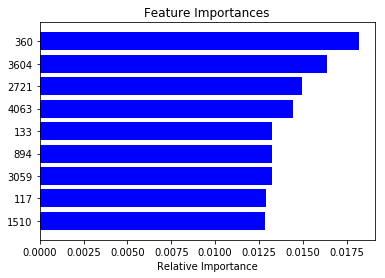

In [68]:
#to display which features(columns) are important on basis of training the data on the Y label (target)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(X,Y)
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [69]:
#displaying which proteomics are top 10 based on importance
Cols = [features[i] for i in indices]
Cols

[1510, 117, 3059, 894, 133, 4063, 2721, 3604, 360]

In [70]:
cols = [3604, 360]

In [71]:
#Using the reduced features
X_reduced = X.iloc[:,cols]
X_reduced.head()

,3604,360
Testing_1,2.538184,1.033618
Testing_2,3.358494,3.610917
Testing_3,1.842168,2.773008
Testing_4,2.615575,3.003637
Testing_5,4.132943,2.647937


In [72]:
#using kmeans clustering on the training proteomics data having reduced features
#reduced features with 80 clusters as 79 are unique (0-79) (appear only once)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_reduced)
y_kmeans = kmeans.predict(X_reduced)
y_kmeans

array([2, 0, 1, 0, 0, 3, 2, 2, 1, 0, 1, 0, 3, 0, 0, 3, 2, 2, 3, 2, 1, 3,
       2, 0, 2, 3, 0, 1, 2, 2, 3, 0, 3, 2, 3, 3, 2, 1, 3, 1, 1, 1, 0, 0,
       2, 2, 2, 1, 3, 3, 1, 1, 2, 1, 2, 3, 2, 3, 3, 2, 0, 0, 2, 2, 2, 0,
       3, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0, 2, 0, 3], dtype=int32)

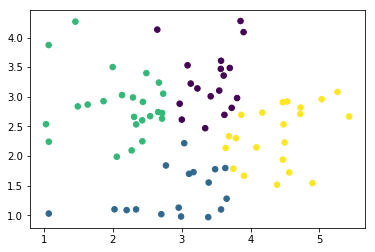

In [73]:
plt.scatter(X_reduced[360], X_reduced[3604], c=y_kmeans, s=31);

In [74]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
X_reduced, Y = make_classification(n_features=30,random_state=0)
clf = LinearSVC(random_state=0)
clf.fit(X_reduced,Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [75]:
clf.score(X_reduced, Y)

0.98

In [76]:
#finalDf = pd.concat([X_reduced, Ymsi], axis = 1)
#finalDf

In [77]:
a =[]
b =[]
c =[]
d=[]

for i in range(0,80):
    if y_kmeans[i] ==0:
        a.append(i)
    if y_kmeans[i] ==1:
        b.append(i)
    if y_kmeans[i] ==2:
        c.append(i)
    if y_kmeans[i] ==3:
        d.append(i)


In [78]:
a,b,c,d

([1, 3, 4, 9, 11, 13, 14, 23, 26, 31, 42, 43, 60, 61, 65, 73, 76, 78],
 [2, 8, 10, 20, 27, 37, 39, 40, 41, 47, 50, 51, 53, 68, 69, 74, 75],
 [0,
  6,
  7,
  16,
  17,
  19,
  22,
  24,
  28,
  29,
  33,
  36,
  44,
  45,
  46,
  52,
  54,
  56,
  59,
  62,
  63,
  64,
  72,
  77],
 [5,
  12,
  15,
  18,
  21,
  25,
  30,
  32,
  34,
  35,
  38,
  48,
  49,
  55,
  57,
  58,
  66,
  67,
  70,
  71,
  79])

In [79]:
for index in a:
    print(Ymsi[index],index)

MSI-Low/MSS 1
MSI-Low/MSS 3
MSI-Low/MSS 4
MSI-Low/MSS 9
MSI-Low/MSS 11
MSI-Low/MSS 13
MSI-Low/MSS 14
MSI-High 23
MSI-Low/MSS 26
MSI-Low/MSS 31
MSI-High 42
MSI-Low/MSS 43
MSI-Low/MSS 60
MSI-Low/MSS 61
MSI-Low/MSS 65
MSI-Low/MSS 73
MSI-Low/MSS 76
MSI-Low/MSS 78


In [80]:
a_refined=[]
for index in a:
    if Ymsi[index]=='MSI-Low/MSS':
        a_refined.append(index)
a_refined

[1, 3, 4, 9, 11, 13, 14, 26, 31, 43, 60, 61, 65, 73, 76, 78]

In [81]:
for index in b:
    print(Ymsi[index],index)

MSI-Low/MSS 2
MSI-Low/MSS 8
MSI-Low/MSS 10
MSI-Low/MSS 20
MSI-High 27
MSI-Low/MSS 37
MSI-Low/MSS 39
MSI-Low/MSS 40
MSI-Low/MSS 41
MSI-High 47
MSI-Low/MSS 50
MSI-Low/MSS 51
MSI-Low/MSS 53
MSI-Low/MSS 68
MSI-High 69
MSI-Low/MSS 74
MSI-Low/MSS 75


In [82]:
b_refined=[]
for index in b:
    if Ymsi[index]=='MSI-Low/MSS':
        b_refined.append(index)
b_refined

[2, 8, 10, 20, 37, 39, 40, 41, 50, 51, 53, 68, 74, 75]

In [83]:
for index in c:
    print(Ymsi[index],index)

MSI-Low/MSS 0
MSI-Low/MSS 6
MSI-Low/MSS 7
MSI-Low/MSS 16
MSI-High 17
MSI-Low/MSS 19
MSI-Low/MSS 22
MSI-Low/MSS 24
MSI-Low/MSS 28
MSI-Low/MSS 29
MSI-Low/MSS 33
MSI-High 36
MSI-Low/MSS 44
MSI-High 45
MSI-Low/MSS 46
MSI-Low/MSS 52
MSI-Low/MSS 54
MSI-Low/MSS 56
MSI-Low/MSS 59
MSI-Low/MSS 62
MSI-Low/MSS 63
MSI-Low/MSS 64
MSI-Low/MSS 72
MSI-Low/MSS 77


In [84]:
c_refined=[]
for index in c:
    if Ymsi[index]=='MSI-Low/MSS':
        c_refined.append(index)
c_refined

[0,
 6,
 7,
 16,
 19,
 22,
 24,
 28,
 29,
 33,
 44,
 46,
 52,
 54,
 56,
 59,
 62,
 63,
 64,
 72,
 77]

In [85]:
for index in d:
    print(Ymsi[index],index)

MSI-Low/MSS 5
MSI-Low/MSS 12
MSI-Low/MSS 15
MSI-Low/MSS 18
MSI-High 21
MSI-Low/MSS 25
MSI-Low/MSS 30
MSI-Low/MSS 32
MSI-Low/MSS 34
MSI-High 35
MSI-Low/MSS 38
MSI-High 48
MSI-Low/MSS 49
MSI-Low/MSS 55
MSI-High 57
MSI-Low/MSS 58
MSI-Low/MSS 66
MSI-Low/MSS 67
MSI-High 70
MSI-Low/MSS 71
MSI-High 79


In [86]:
d_refined=[]
for index in d:
    if Ymsi[index]=='MSI-Low/MSS':
        d_refined.append(index)
d_refined

[5, 12, 15, 18, 25, 30, 32, 34, 38, 49, 55, 58, 66, 67, 71]

In [87]:
refined=[]
refined=a_refined + b_refined + c_refined + d_refined
len(refined)

66

In [51]:
#to check that clustering was correct, i.e 80 clusters were formed
pd.DataFrame(y_kmeans).nunique()

0    4
dtype: int64

In [56]:
#importing the testing proteomics data 
import pandas as pd
import numpy as np

tsv_file='test_pro.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('test_pro1.csv',index=False)

In [57]:
#loading the testing proteomics data in "tdata" dataframe
try:
  tdata = pd.read_csv('test_pro1.csv')
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [58]:
#to display the testing proteomics data
tdata.head()

,Testing_1,Testing_2,Testing_3,Testing_4,Testing_5,Testing_6,Testing_7,Testing_8,Testing_9,Testing_10,...,Testing_71,Testing_72,Testing_73,Testing_74,Testing_75,Testing_76,Testing_77,Testing_78,Testing_79,Testing_80
0,3.446723,3.669580,3.398472,3.112875,3.535956,3.222556,4.011226,3.660633,2.459769,3.529445,...,2.747886,3.107907,2.796258,3.975565,3.854046,3.840117,2.531494,2.642408,3.913182,4.141304
1,5.994520,6.371038,6.132440,5.645341,5.532811,5.754886,5.917435,6.056136,5.526915,5.652671,...,6.164473,6.404276,5.067085,6.497901,5.259377,6.172335,5.496268,6.395966,5.963701,6.308505
2,2.168001,2.410543,NaN,2.211822,0.987561,1.737837,2.381688,2.193863,1.759665,2.310238,...,2.842435,1.694889,1.520694,2.860077,2.233857,2.305192,1.470474,1.073909,1.102109,1.088823
3,NaN,1.024838,NaN,1.099892,1.076615,1.001861,1.924734,1.024838,NaN,1.878005,...,2.481767,NaN,1.978784,1.024838,NaN,0.990946,2.821773,1.428959,NaN,NaN
4,NaN,0.991114,1.096724,1.056902,NaN,NaN,1.010897,0.991114,NaN,1.010897,...,1.181934,1.044511,1.010897,0.991114,1.066978,NaN,1.911122,NaN,1.040694,NaN


In [59]:
#to replace the NaN values by the mean of each row for every individual row
X_tdata = tdata.apply(lambda x: x.fillna(x.mean()),axis=0)

In [60]:
#to display the testing proteomics data having NaN values replaced by mean for every individual row
replacedX_data=X_tdata
replacedX_data

,Testing_1,Testing_2,Testing_3,Testing_4,Testing_5,Testing_6,Testing_7,Testing_8,Testing_9,Testing_10,...,Testing_71,Testing_72,Testing_73,Testing_74,Testing_75,Testing_76,Testing_77,Testing_78,Testing_79,Testing_80
0,3.446723,3.669580,3.398472,3.112875,3.535956,3.222556,4.011226,3.660633,2.459769,3.529445,...,2.747886,3.107907,2.796258,3.975565,3.854046,3.840117,2.531494,2.642408,3.913182,4.141304
1,5.994520,6.371038,6.132440,5.645341,5.532811,5.754886,5.917435,6.056136,5.526915,5.652671,...,6.164473,6.404276,5.067085,6.497901,5.259377,6.172335,5.496268,6.395966,5.963701,6.308505
2,2.168001,2.410543,2.691813,2.211822,0.987561,1.737837,2.381688,2.193863,1.759665,2.310238,...,2.842435,1.694889,1.520694,2.860077,2.233857,2.305192,1.470474,1.073909,1.102109,1.088823
3,2.702256,1.024838,2.691813,1.099892,1.076615,1.001861,1.924734,1.024838,2.696292,1.878005,...,2.481767,2.693591,1.978784,1.024838,2.696690,0.990946,2.821773,1.428959,2.701440,2.710897
4,2.702256,0.991114,1.096724,1.056902,2.715043,2.709113,1.010897,0.991114,2.696292,1.010897,...,1.181934,1.044511,1.010897,0.991114,1.066978,2.707427,1.911122,2.719052,1.040694,2.710897
5,1.613696,1.192009,2.132646,2.060400,2.715043,1.075423,2.716845,1.159681,1.044635,1.045045,...,1.468225,2.046624,1.045045,2.711026,2.696690,2.707427,0.972637,2.260567,1.936448,1.063533
6,2.702256,2.706912,1.141625,2.696098,1.067227,1.014224,1.300961,1.795226,1.121261,0.993668,...,1.011458,1.077069,1.366804,2.711026,1.104801,1.439101,1.647679,1.774456,1.017341,1.006191
7,4.412741,4.769827,4.273302,4.904586,2.481525,4.891808,4.503892,4.751650,4.131871,4.488877,...,4.759783,4.641377,4.982153,4.164989,4.587642,4.488880,4.315871,4.961583,4.591923,4.909370
8,3.166511,3.096463,0.998518,2.417391,3.285401,1.871325,2.578830,2.279372,2.636759,2.235929,...,2.663579,2.685089,1.137934,1.956399,2.431295,2.153919,1.792729,1.137934,2.315202,2.709761
9,1.056106,2.355183,2.691813,2.696098,1.049430,1.739160,1.881613,1.880328,1.092284,0.986305,...,1.544935,2.161040,1.488466,1.759246,2.696690,2.707427,1.500245,0.986305,2.701440,1.002654


In [61]:
#for transposing as the target has 80 outputs and the data given above has 80 columns and 4118 rows
X_tdata = X_tdata.T

In [62]:
#for displaying the transposed data
X_tdata

,0,1,2,3,4,5,6,7,8,9,...,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117
Testing_1,3.446723,5.994520,2.168001,2.702256,2.702256,1.613696,2.702256,4.412741,3.166511,1.056106,...,2.702256,2.528991,2.702256,2.245434,2.702256,1.058798,1.848274,2.565798,3.597116,1.636396
Testing_2,3.669580,6.371038,2.410543,1.024838,0.991114,1.192009,2.706912,4.769827,3.096463,2.355183,...,1.005540,1.976372,2.706912,1.287584,1.733361,2.706912,0.997150,2.265862,3.967766,1.802938
Testing_3,3.398472,6.132440,2.691813,2.691813,1.096724,2.132646,1.141625,4.273302,0.998518,2.691813,...,2.691813,1.399577,2.691813,1.908988,1.126579,2.691813,1.120824,2.944166,3.779964,1.756282
Testing_4,3.112875,5.645341,2.211822,1.099892,1.056902,2.060400,2.696098,4.904586,2.417391,2.696098,...,1.076813,2.571042,2.696098,2.288274,1.081373,1.780610,1.074043,2.696098,3.918465,2.696098
Testing_5,3.535956,5.532811,0.987561,1.076615,2.715043,2.715043,1.067227,2.481525,3.285401,1.049430,...,2.715043,2.523349,2.715043,2.886522,2.715043,1.721321,2.715043,1.795269,3.535849,2.715043
Testing_6,3.222556,5.754886,1.737837,1.001861,2.709113,1.075423,1.014224,4.891808,1.871325,1.739160,...,2.709113,1.973658,2.709113,0.994825,1.018976,1.017950,1.584643,1.989170,4.407917,1.059954
Testing_7,4.011226,5.917435,2.381688,1.924734,1.010897,2.716845,1.300961,4.503892,2.578830,1.881613,...,2.716845,2.095368,2.716845,2.029065,1.946029,1.370977,1.326519,2.293683,3.839484,2.716845
Testing_8,3.660633,6.056136,2.193863,1.024838,0.991114,1.159681,1.795226,4.751650,2.279372,1.880328,...,2.713637,2.972734,2.713637,2.270721,1.720879,1.005174,2.422197,1.996383,3.979165,2.463100
Testing_9,2.459769,5.526915,1.759665,2.696292,2.696292,1.044635,1.121261,4.131871,2.636759,1.092284,...,2.696292,2.696292,2.696292,1.844459,2.696292,2.696292,2.696292,1.181041,4.041102,1.698926
Testing_10,3.529445,5.652671,2.310238,1.878005,1.010897,1.045045,0.993668,4.488877,2.235929,0.986305,...,2.721499,2.035760,2.721499,1.714705,0.996874,0.993088,1.873740,2.433754,4.237667,2.255463


In [63]:
#to allocate the 80 columns in X_tdata for using it for training (X value in model(X,Y) where Y is target(label))
X_tdata = X_tdata.iloc[:,Cols]

In [64]:
try:
  data_cli = pd.read_csv('train_cli.csv')
  print('Success: Data loaded into dataframe.')
except Exception as e:
    print('Data load error: ',e)

Success: Data loaded into dataframe.


In [65]:
data_cli

,sample,gender,msi,target
0,Training_1,Female,MSI-Low/MSS,0
1,Training_2,Female,MSI-Low/MSS,0
2,Training_3,Male,MSI-Low/MSS,2
3,Training_4,Female,MSI-Low/MSS,0
4,Training_5,Female,MSI-Low/MSS,0
5,Training_6,Male,MSI-High,3
6,Training_7,Female,MSI-High,1
7,Training_8,Female,MSI-High,1
8,Training_9,Female,MSI-Low/MSS,0
9,Training_10,Female,MSI-High,1


In [66]:
#data_cli['target'] = np.where(data_cli['gender']=='Female' and data_cli['msi']=='MSI-Low/MSS', '0', '1')

In [67]:
#data_cli['Target'] = data_cli.apply(f, axis=1)

In [68]:
data_cli.head()

,sample,gender,msi,target
0,Training_1,Female,MSI-Low/MSS,0
1,Training_2,Female,MSI-Low/MSS,0
2,Training_3,Male,MSI-Low/MSS,2
3,Training_4,Female,MSI-Low/MSS,0
4,Training_5,Female,MSI-Low/MSS,0


In [69]:
#frame = data_cli[data_cli[]]

In [70]:
MSI = data_cli['msi']== 'MSI-Low/MSS'

In [71]:
Gender =  data_cli['gender']== 'Female'

In [74]:
MSILOWFEMALE  = [ MSI[i] and Gender[i] for i in range(0,len(MSI))]

In [75]:
np.logical_and(data_cli['msi']== 'MSI-Low/MSS', data_cli['gender']== 'Female')

0      True
1      True
2     False
3      True
4      True
5     False
6     False
7     False
8      True
9     False
10     True
11    False
12     True
13     True
14    False
15     True
16     True
17     True
18     True
19    False
20     True
21     True
22     True
23    False
24    False
25     True
26     True
27    False
28     True
29    False
      ...  
50    False
51     True
52    False
53     True
54     True
55     True
56     True
57     True
58     True
59    False
60    False
61     True
62     True
63    False
64    False
65    False
66     True
67    False
68    False
69    False
70     True
71    False
72    False
73    False
74    False
75    False
76     True
77     True
78    False
79     True
Name: msi, Length: 80, dtype: bool

In [76]:
for i in range(0,len(data_cli)):
    print(data_cli.iloc[i,:])

sample     Training_1
gender         Female
msi       MSI-Low/MSS
target              0
Name: 0, dtype: object
sample     Training_2
gender         Female
msi       MSI-Low/MSS
target              0
Name: 1, dtype: object
sample     Training_3
gender           Male
msi       MSI-Low/MSS
target              2
Name: 2, dtype: object
sample     Training_4
gender         Female
msi       MSI-Low/MSS
target              0
Name: 3, dtype: object
sample     Training_5
gender         Female
msi       MSI-Low/MSS
target              0
Name: 4, dtype: object
sample    Training_6
gender          Male
msi         MSI-High
target             3
Name: 5, dtype: object
sample    Training_7
gender        Female
msi         MSI-High
target             1
Name: 6, dtype: object
sample    Training_8
gender        Female
msi         MSI-High
target             1
Name: 7, dtype: object
sample     Training_9
gender         Female
msi       MSI-Low/MSS
target              0
Name: 8, dtype: object
sample    Tra

In [77]:
mat = data_cli.values

In [78]:
op = []
for i in range(0,len(mat)):
    if mat[i][1]=='Female' and mat[i][2]=='MSI-Low/MSS':
        op.append(0)
    if mat[i][1]=='Female' and mat[i][2]=='MSI-High':
        op.append(1)
    if mat[i][1]=='Male' and mat[i][2]=='MSI-Low/MSS':
        op.append(2)
    if mat[i][1]=='Male' and mat[i][2]=='MSI-High':
        op.append(3)


In [79]:
op

[0,
 0,
 2,
 0,
 0,
 3,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 3,
 2,
 1,
 2,
 0,
 0,
 2,
 0]